In [ ]:
# prompt: unzip /content/MNIST Dataset JPG format.zip

!unzip /content/MNIST\ Dataset\ JPG\ format.zip


Streaming output truncated to the last 5000 lines.
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/1820.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18211.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18228.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18241.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18251.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/1826.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18277.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18296.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/183.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18350.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18355.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - training/9/18374.jpg  
 extracting: MNIST Dataset JPG format/MNIST - JPG - t

In [ ]:
training_dir = '/content/MNIST Dataset JPG format/MNIST - JPG - training/'
testing_dir = '/content/MNIST Dataset JPG format/MNIST - JPG - testing/'

In [ ]:
#defining hog parameters
hog_params = {
    'orientations' : 9, 'pixels_per_cell' : (8,8),
    'cells_per_block' : (2,2), 'block_norm' : 'L2-Hys',
    'transform_sqrt' : True
}

In [ ]:
import os
import cv2
from skimage.feature import hog
import numpy as np

def feature_extraction(dir):
  feature = []
  labels = []
  for num in range(10):
    for img in os.listdir(dir + str(num)):
      img_path = dir + str(num) + '/' + img
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (28, 28))
      feat = hog(img, **hog_params)
      feature.append(feat)
      labels.append(num)
  return np.array(feature), np.array(labels)


In [ ]:
training_data, training_labels = feature_extraction(training_dir)
testing_data, testing_labels = feature_extraction(testing_dir)

In [ ]:
training_data.shape

(60000, 144)

In [ ]:
training_labels.shape

(60000,)

## SVM with linear kernel and C = 1

training on 60% data...
training accuracy: 0.9472222222222222
validation accuracy: 0.9370416666666667
testing accuracy: 0.9423
training on 70% data...
training accuracy: 0.9459047619047619
validation accuracy: 0.9390555555555555
testing accuracy: 0.9422
training on 80% data...
training accuracy: 0.94625
validation accuracy: 0.9385833333333333
testing accuracy: 0.9438
training on 90% data...
training accuracy: 0.9472037037037037
validation accuracy: 0.938
testing accuracy: 0.9438


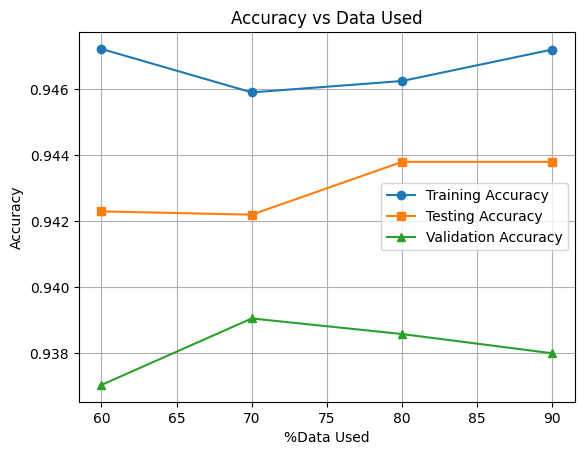

In [ ]:
# training a svm model on a linear kernel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_used = []
training_data_acc = []
testing_data_acc = []
validation_data_acc = []

for percentage_data in range(6,10):
  data_used.append(percentage_data*10)
  print(f"training on {percentage_data*10}% data...")

  X_train, X_val, y_train, y_val = train_test_split(training_data, training_labels, test_size= 1 - 0.1*percentage_data, random_state=42)
  model = SVC(kernel = 'linear', C = 1)
  model.fit(X_train, y_train)

  #prediction on training data
  y_pred_train = model.predict(X_train)
  training_acc = accuracy_score(y_train, y_pred_train)
  training_data_acc.append(training_acc)
  print(f"training accuracy: {training_acc}")

  #prediction on validation data
  y_pred_val = model.predict(X_val)
  validation_acc = accuracy_score(y_val, y_pred_val)
  validation_data_acc.append(validation_acc)
  print(f"validation accuracy: {validation_acc}")

  #prediction on testing data
  y_pred_test = model.predict(testing_data)
  testing_acc = accuracy_score(testing_labels, y_pred_test)
  testing_data_acc.append(testing_acc)
  print(f"testing accuracy: {testing_acc}")

# Plotting
plt.plot(data_used, training_data_acc, label="Training Accuracy", marker='o')
plt.plot(data_used, testing_data_acc, label="Testing Accuracy", marker='s')
plt.plot(data_used, validation_data_acc, label="Validation Accuracy", marker='^')

plt.xlabel("%Data Used")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Data Used")
plt.legend()
plt.grid()
plt.show()


## SVM with linear kernel and C = 10

training on 60% data...
training accuracy: 0.9565277777777778
validation accuracy: 0.9395416666666667
testing accuracy: 0.9443
training on 70% data...
training accuracy: 0.9558809523809524
validation accuracy: 0.9413888888888889
testing accuracy: 0.9463
training on 80% data...
training accuracy: 0.9559791666666667
validation accuracy: 0.94275
testing accuracy: 0.9473
training on 90% data...
training accuracy: 0.955574074074074
validation accuracy: 0.9393333333333334
testing accuracy: 0.9475


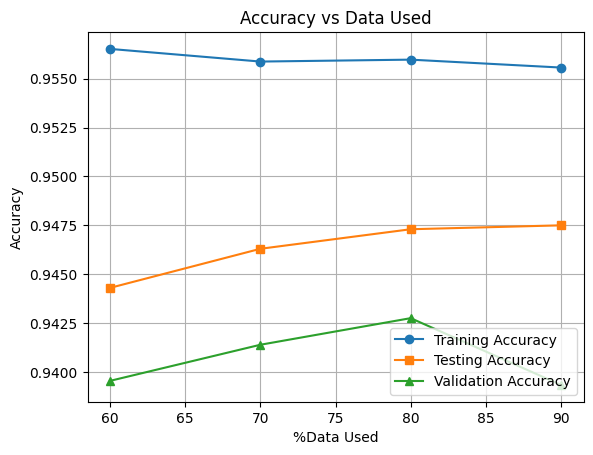

In [ ]:
data_used = []
training_data_acc = []
testing_data_acc = []
validation_data_acc = []

for percentage_data in range(6,10):
  data_used.append(percentage_data*10)
  print(f"training on {percentage_data*10}% data...")

  X_train, X_val, y_train, y_val = train_test_split(training_data, training_labels, test_size= 1 - 0.1*percentage_data, random_state=42)
  model = SVC(kernel = 'linear', C = 10)
  model.fit(X_train, y_train)

  #prediction on training data
  y_pred_train = model.predict(X_train)
  training_acc = accuracy_score(y_train, y_pred_train)
  training_data_acc.append(training_acc)
  print(f"training accuracy: {training_acc}")

  #prediction on validation data
  y_pred_val = model.predict(X_val)
  validation_acc = accuracy_score(y_val, y_pred_val)
  validation_data_acc.append(validation_acc)
  print(f"validation accuracy: {validation_acc}")

  #prediction on testing data
  y_pred_test = model.predict(testing_data)
  testing_acc = accuracy_score(testing_labels, y_pred_test)
  testing_data_acc.append(testing_acc)
  print(f"testing accuracy: {testing_acc}")

# Plotting
plt.plot(data_used, training_data_acc, label="Training Accuracy", marker='o')
plt.plot(data_used, testing_data_acc, label="Testing Accuracy", marker='s')
plt.plot(data_used, validation_data_acc, label="Validation Accuracy", marker='^')

plt.xlabel("%Data Used")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Data Used")
plt.legend()
plt.grid()
plt.show()

## SVM with rbf kernel and C = 1

training on 60% data...
training accuracy: 0.9760555555555556
validation accuracy: 0.9602083333333333
testing accuracy: 0.9614
training on 70% data...
training accuracy: 0.9759523809523809
validation accuracy: 0.9627222222222223
testing accuracy: 0.9623
training on 80% data...
training accuracy: 0.9763333333333334
validation accuracy: 0.96375
testing accuracy: 0.9627
training on 90% data...
training accuracy: 0.9766296296296296
validation accuracy: 0.9638333333333333
testing accuracy: 0.9637


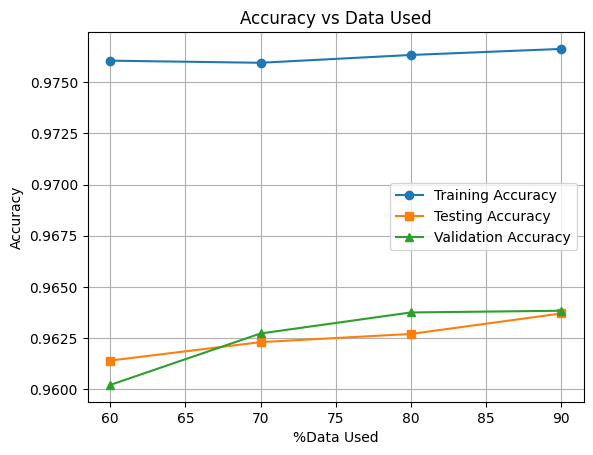

In [ ]:
data_used = []
training_data_acc = []
testing_data_acc = []
validation_data_acc = []

for percentage_data in range(6,10):
  data_used.append(percentage_data*10)
  print(f"training on {percentage_data*10}% data...")

  X_train, X_val, y_train, y_val = train_test_split(training_data, training_labels, test_size= 1 - 0.1*percentage_data, random_state=42)
  model = SVC(kernel = 'rbf', C = 1)
  model.fit(X_train, y_train)

  #prediction on training data
  y_pred_train = model.predict(X_train)
  training_acc = accuracy_score(y_train, y_pred_train)
  training_data_acc.append(training_acc)
  print(f"training accuracy: {training_acc}")

  #prediction on validation data
  y_pred_val = model.predict(X_val)
  validation_acc = accuracy_score(y_val, y_pred_val)
  validation_data_acc.append(validation_acc)
  print(f"validation accuracy: {validation_acc}")

  #prediction on testing data
  y_pred_test = model.predict(testing_data)
  testing_acc = accuracy_score(testing_labels, y_pred_test)
  testing_data_acc.append(testing_acc)
  print(f"testing accuracy: {testing_acc}")

# Plotting
plt.plot(data_used, training_data_acc, label="Training Accuracy", marker='o')
plt.plot(data_used, testing_data_acc, label="Testing Accuracy", marker='s')
plt.plot(data_used, validation_data_acc, label="Validation Accuracy", marker='^')

plt.xlabel("%Data Used")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Data Used")
plt.legend()
plt.grid()
plt.show()

training on 60% data...
training accuracy: 0.9985
validation accuracy: 0.9654583333333333
testing accuracy: 0.964
training on 70% data...
training accuracy: 0.9980714285714286
validation accuracy: 0.9677777777777777
testing accuracy: 0.9642
training on 80% data...
training accuracy: 0.9979583333333333
validation accuracy: 0.9679166666666666
testing accuracy: 0.9671
training on 90% data...
training accuracy: 0.9979814814814815
validation accuracy: 0.9703333333333334
testing accuracy: 0.9663


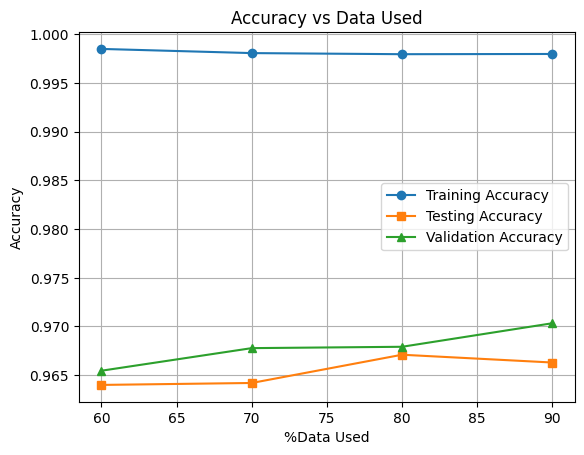

In [ ]:
data_used = []
training_data_acc = []
testing_data_acc = []
validation_data_acc = []

for percentage_data in range(6,10):
  data_used.append(percentage_data*10)
  print(f"training on {percentage_data*10}% data...")

  X_train, X_val, y_train, y_val = train_test_split(training_data, training_labels, test_size= 1 - 0.1*percentage_data, random_state=42)
  model = SVC(kernel = 'rbf', C = 10)
  model.fit(X_train, y_train)

  #prediction on training data
  y_pred_train = model.predict(X_train)
  training_acc = accuracy_score(y_train, y_pred_train)
  training_data_acc.append(training_acc)
  print(f"training accuracy: {training_acc}")

  #prediction on validation data
  y_pred_val = model.predict(X_val)
  validation_acc = accuracy_score(y_val, y_pred_val)
  validation_data_acc.append(validation_acc)
  print(f"validation accuracy: {validation_acc}")

  #prediction on testing data
  y_pred_test = model.predict(testing_data)
  testing_acc = accuracy_score(testing_labels, y_pred_test)
  testing_data_acc.append(testing_acc)
  print(f"testing accuracy: {testing_acc}")

# Plotting
plt.plot(data_used, training_data_acc, label="Training Accuracy", marker='o')
plt.plot(data_used, testing_data_acc, label="Testing Accuracy", marker='s')
plt.plot(data_used, validation_data_acc, label="Validation Accuracy", marker='^')

plt.xlabel("%Data Used")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Data Used")
plt.legend()
plt.grid()
plt.show()